# Bayesian Inference and MCMC from Scratch

$$P(\theta|x) = \frac{P(x|\theta) P(\theta)}{P(x)}$$
likelihood (how we think our data is distributed) time the prior (what we think about params theta before we have seen any data) divided by the evidence (the evidence that the data x was generated by this model). The evidence can theoretically be computed by integrating over all possible parameter values; difficult if not impossible to do in practice. We can't calc the posterior, but we can use MCMC. 

In statistics, Markov chain Monte Carlo (MCMC) methods comprise a class of algorithms for sampling from a probability distribution. By constructing a Markov chain that has the desired distribution as its equilibrium distribution, one can obtain a sample of the desired distribution by observing the chain after a number of steps. The more steps there are, the more closely the distribution of the sample matches the actual desired distribution.



In [1]:
%matplotlib inline

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm

np.random.seed(123)

import warnings
warnings.filterwarnings("ignore")

In [2]:
sns.set(rc={'figure.figsize': (15, 8)})

Generate some random data, Normally distributed.

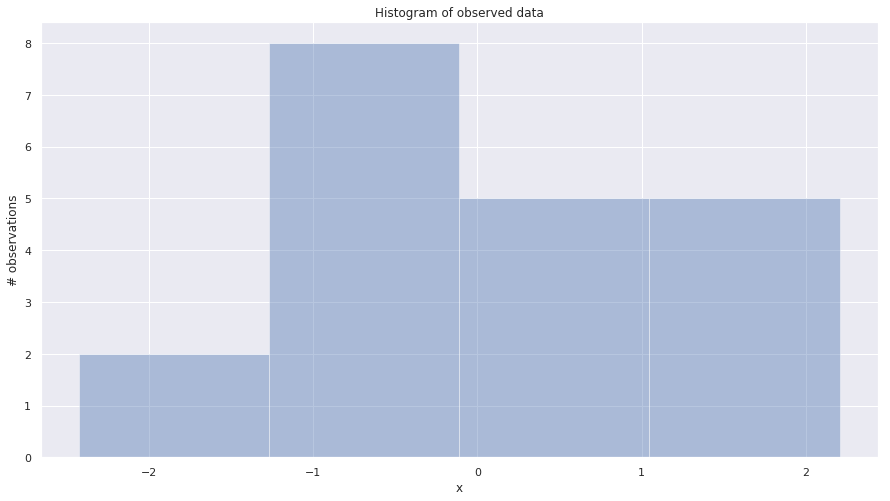

In [3]:
data = np.random.normal(loc=0, scale=1, size=20)

ax = plt.subplot()
sns.distplot(data, kde=False, ax=ax)
_ = ax.set(title='Histogram of observed data', xlabel='x', ylabel='# observations');

## Analytic Solution

We know the normal distribution

$$p(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp \left\{-\frac{1}{2}\frac{(x-\mu)^2}{\sigma^2} \right\}$$

In [4]:
def normal_dist(x, mu=0, stdev=1):
    return (1./np.sqrt(2*np.pi*stdev*stdev)) * np.exp(-((x-mu)**2)/(2*stdev*stdev))

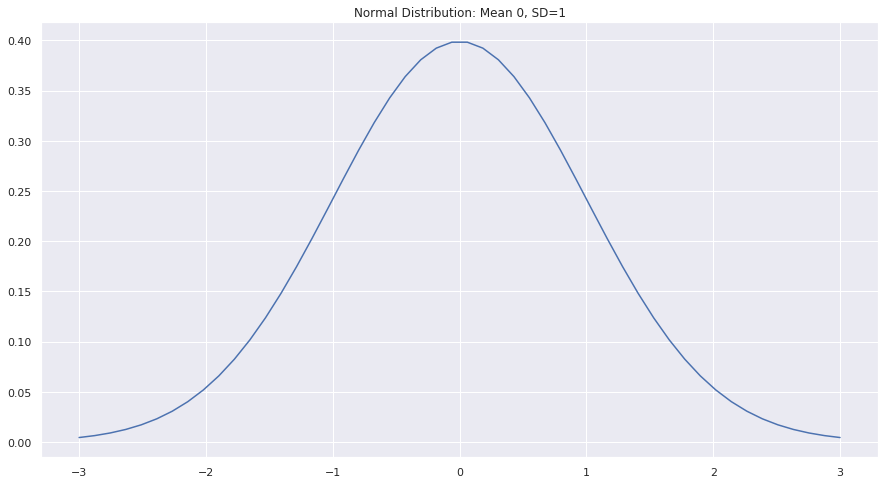

In [5]:
plt.plot(np.linspace(start=-3,stop=3), normal_dist(np.linspace(start=-3,stop=3)));
plt.title('Normal Distribution: Mean 0, SD=1');

In [6]:
def likelihood(data, dist, mu=0, sigma=1):
    return np.prod(dist(data, mu, sigma))

In [7]:
likelihood(data, normal_dist)

2.739602157412618e-15

The likelihood is

$$ p(X|\mu) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} \exp \left\{-\frac{1}{2}\frac{(x-\mu)^2}{\sigma^2} \right\}$$

So if you observe a bunch of x's (IID), you can see, given an assumption about mu (and sigma), what the likelihood is (this is the prob of this data draw given the params). This number will be very small and is not a probabilty per se; it can be compared to other likelihood values for other parameter assumptions.

For example, given our data, lets see what the likelihood looks like for different assumptions about mu:

In [8]:
x_vals = np.linspace(-3, 3, num=200)
lik = []
for i in x_vals:
    lik.append(likelihood(data, normal_dist, i))

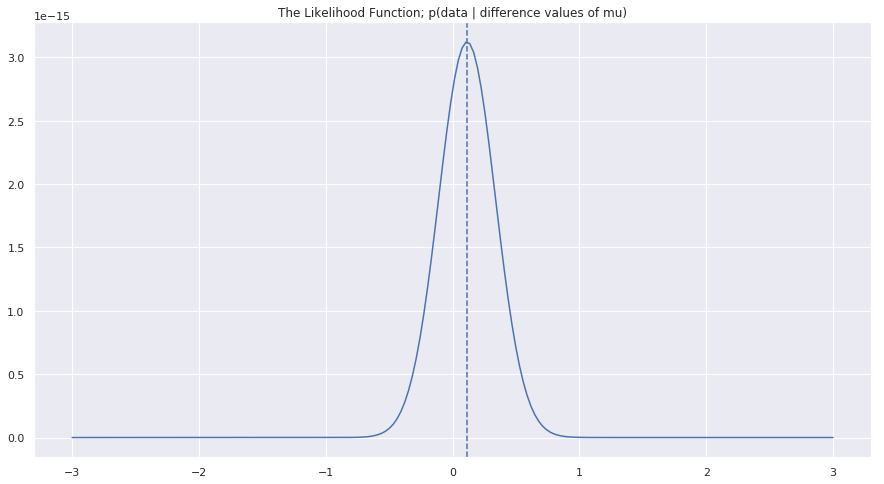

In [9]:
plt.plot(x_vals, lik)
plt.axvline(np.mean(data), ls='dashed');
plt.title('The Likelihood Function; p(data | difference values of mu)');

Here we can see that "maximum likelihood" occurs at the sample mean. In other words, the sample mean is the maximum likelihood estimator of the mean.

What about Bayes rule and the posterior? We can ignore the denominator; that's a "normalizing constant" and is not a function of the params; it's the same for all params. So what we care about is

$$P(\theta|x) \propto  P(x|\theta) P(\theta)$$


In [10]:
prior = normal_dist(x_vals)

In [11]:
posterior = lik*prior

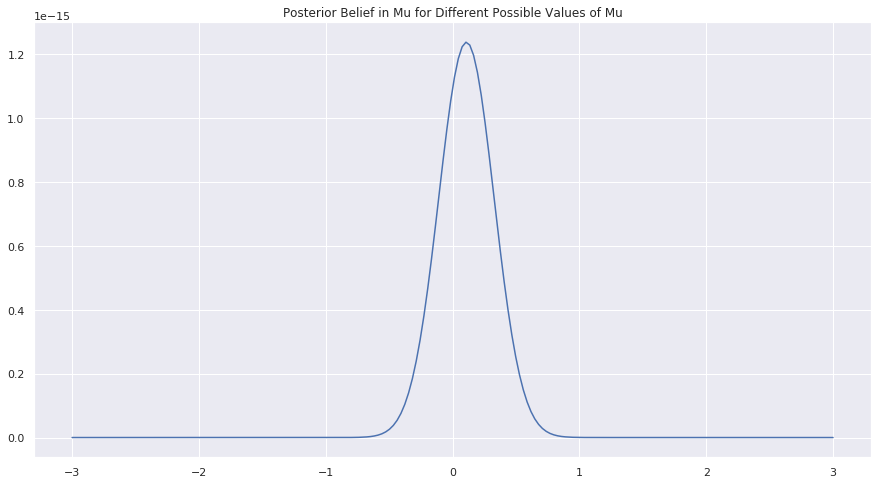

In [12]:
plt.plot(x_vals, posterior);
plt.title('Posterior Belief in Mu for Different Possible Values of Mu');